In [6]:
from matplotlib import pylab as plt
import numpy as np

def plot_image(img=None, cmap='gray', interpolation='nearest', figsize=(3,3)):
    '''Plot input image img'''
    plt.figure(figsize=figsize)
    plt.xticks([]) # disable x-axis ticks and labels
    plt.yticks([]) # disable y-axis ticks and labels
    if img is not None:
        plt.imshow(img, cmap=plt.get_cmap(cmap), interpolation=interpolation)
    else:
        plt.imshow(self.img, cmap=plt.get_cmap(cmap), interpolation=interpolation)

In [8]:
def read_image(path):
    '''Read image from local path or URL in the input path
       Returns: image as a nested list
    '''
    from imageio.v2 import imread
    if isinstance(path, str):
        try:
            img = imread(path)
            return img
        except:
            print('Could not read the image at path:', path)
    else:
        print('input path must be a string, not', path)


In [10]:
def plot_prettier(dpi=150, fontsize=11, usetex=False): 
    '''
    Make plots look nicer compared to Matplotlib defaults
    Parameters: 
        dpi - int, "dots per inch" - controls resolution of PNG images that are produced
                by Matplotlib
        fontsize - int, font size to use overall
        usetex - bool, whether to use LaTeX to render fonds of axes labels 
                use False if you don't have LaTeX installed on your system
    '''
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in') 
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    if usetex:
        plt.rc('text', usetex=usetex)
    else:
        plt.rcParams['mathtext.fontset'] = 'cm'
        plt.rcParams['font.family'] = 'serif'
        plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

        
plot_prettier()

<font size=4 color='black'>Plotting a bar chart with Matplotlib</font>

Three recent measurements of $H_0$ are: $H_0=69.8\pm 1.6$ km/s/Mpc (using tip of red giant branch or TRGB method),   $H_0=73.2\pm 1.3$ km/s/Mpc (using variable Cepheid stars to measure distances),  $H_0=67.4\pm 0.5$ km/s/Mpc (using temperature fluctuations in the cosmic microwave background). 


Here I plot these measurements with their uncertainties from the nested dictionary `h0m`

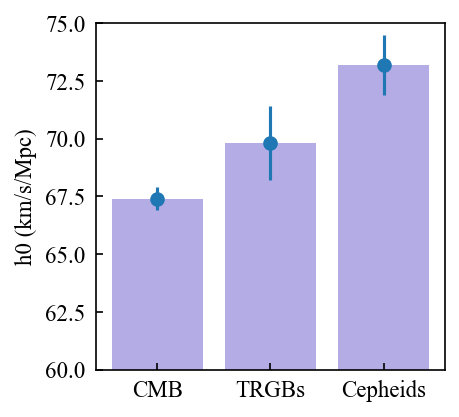

In [17]:
h0m = {'CMB': {'H0': 67.4, 'sigma':0.5}, 
       'TRGBs': {'H0': 69.8, 'sigma': 1.6},
       'Cepheids': {'H0': 73.2, 'sigma': 1.3}} 

keys = list(h0m.keys())

h0_values = []
sigma_values = []

for key in h0m:
    h0_values.append(h0m[key]['H0'])
    sigma_values.append(h0m[key]['sigma'])

sigmas = np.random.normal(1., 0.3, size=len(keys))

plt.figure(figsize=(3,3))
plt.ylabel('h0 (km/s/Mpc)')

plt.bar(keys, h0_values, color='slateblue', alpha=0.5)

plt.errorbar(keys, h0_values, yerr=sigma_values, marker='o', markersize=6,
            linestyle='none')
plt.ylim(60,75)
plt.show()

<font size=4 color='black'>Grayscale method using class Image inherited from the previous class Image </font>

Changing class Image to add functionality and determine whether image is grayscale.

In [27]:
class Image:
    '''
    class for working generic images
    '''
    def __init__(self, img=None):
        if img is not None:            
            self.img = np.array(img)
            self.dims = self.img.shape

In [29]:
def to_grayscale(img):
    '''Convert image in the input list img from RGB to grayscale
       Parameters:
           img: doubly nested list, containing R, G, B intensities for pixels on a scale from 0 to 255
           
        
    '''
    grayscale = []
    for nrow in range(len(img)): # iterate over image rows
        sublst = []
        for ncol in range(len(img[0])): # iterate over image columns
            # compute grayscale intensity g here instead of g=0
            gs = int(0.3*img[nrow][ncol][0] + 0.59*img[nrow][ncol][1] + 0.11*img[nrow][ncol][2])
            sublst.append(gs)
        grayscale.append(sublst)
        
    return grayscale

True


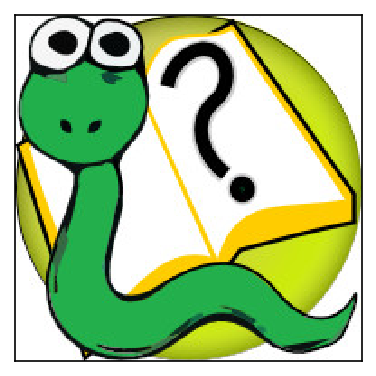

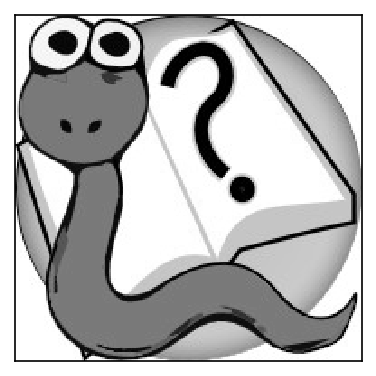

In [32]:
class ImageNew(Image):
    def __init__(self, img=None):
        if img is not None:            
            self.img = np.array(img)
            self.dims = self.img.shape
        super().__init__(img=img)
        if img is not None: 
            if len(self.dims) == 2:
                self.is_grayscale = True
            elif len(self.dims) > 2:
                self.is_grayscale = False

    def to_grayscale(self):
        if self.is_grayscale == False:
            self.img_gs = (0.3*img[:,:,0] + 0.59*img[:,:,1] + 0.11*img[:,:,2])
        else: 
            self.img_gs = None
        
# Producing a color image, grayscale image and checking if grayscale is True 

im = ImageNew(img)

plot_image(img) 

im.to_grayscale()

plot_image(im.img_gs)

im_gs = ImageNew(im.img_gs)

print(im_gs.is_grayscale)

<font size=4 color='black'>Computing running mean and standard deviation using Welford's method</font> 

Using classes.

In [39]:
xr = [-3.2068918237128012, 1.3372332704932148, -0.7699991555734056, 5.5893104109646785, -0.7053263034282076, 
      -4.3034053240563015, 2.96283363228822, 1.4446245987287984, 4.589920860764233, -1.9845166048785736, 
      -1.2519979254196743, -2.628247752242106, -0.5639297762384831, 2.213822508742017, -3.14679337052034, 
      6.665597916382017, -1.0845901025109188, 2.5737012063737335, -0.18629259648002766, 0.30423677547583056]

In [41]:
class RunningMeanSTD():
    def __init__(self, x = None):
        self.m_next = 0 if x is None else x
        self.s_next = 0
        self.data_points = 0 if x is None else 1
        self.std = 0
    def __call__(self, x):
        self.data_points += 1
        if self.data_points == 1:
            self.m_next = x
            self.s_next = 0
            self.std = 0
        elif self.data_points > 1: 
            m_now = self.m_next
            s_now = self.s_next
            self.m_next = m_now + (x - m_now)/(self.data_points)
            self.s_next = s_now + (x - m_now)*(x - self.m_next)
            self.std = (self.s_next/(self.data_points-1))**0.5

        return self.m_next, self.std

run_mstd = RunningMeanSTD()

for x in xr[:3]: 
    mean, std = run_mstd(x)
    print(f'mean = {mean:.7f} st dev = {std:.7f}')
    
run_mstd2 = RunningMeanSTD(xr[0])

for x in xr[1:3]: 
    mean, std = run_mstd2(x)
    print(f'mean = {mean:.7f}  st dev = {std:.7f}')

mean = -3.2068918 st dev = 0.0000000
mean = -0.9348293 st dev = 3.2131817
mean = -0.8798859 st dev = 2.2740546
mean = -0.9348293  st dev = 3.2131817
mean = -0.8798859  st dev = 2.2740546


<font size=4 color='black'>Plotting overlapping histograms using transparency with Matplotlib </font> 

Using pseudo-random number generator to conduct a Monte Carlo experiment and plot overlapping histograms. 

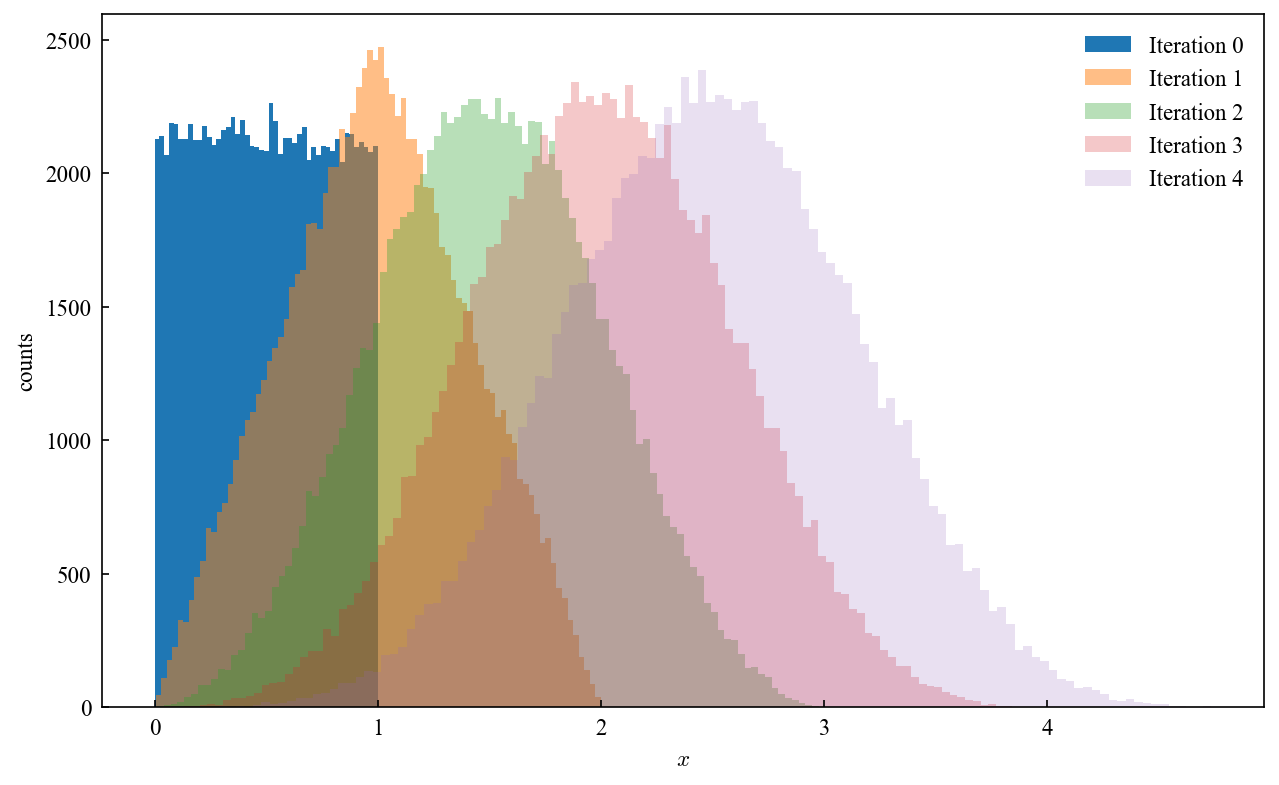

In [61]:
nrand=100000

x = np.zeros(nrand)

plt.figure(figsize=(10, 6))

for i in range(5): 
    random_nums = np.random.uniform(low = 0.0, high = 1.0, size = nrand)
    x += random_nums
    plt.hist(x, bins='auto', alpha=1/(i+1), label=f"Iteration {i}")

plt.xlabel('$x$')
plt.ylabel('counts')
plt.legend(frameon=False, loc='best')
plt.show()